In [1]:
import sys

In [2]:
sys.path.extend(["../src/"])

In [3]:
import text_embeddings
import pandas as pd
import re
from umap import UMAP
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("../data/tweets_classification/train.csv")
df.drop(columns=['hate_speech_count', 'offensive_language_count', 'neither_count', 'count'], inplace=True)
df["class"] = df["class"].apply(lambda x: 0 if x == 2 else 1)

In [5]:
_, sample_df, _, sample_labels = train_test_split(df.loc[:, df.columns != "class"], 
                                                  df["class"], 
                                                  test_size=0.01, 
                                                  stratify=df["class"])

In [6]:
def clean_sentence(text):
    # Removing non-english and non-unocde charaters while keeping hashtags
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s,.!?\-#@]', '', text)

    return cleaned_text

In [7]:
sample_df["tweet_cleaned"] = sample_df["tweet"].apply(lambda x: clean_sentence(x))
sample_df["label"] = sample_labels

In [8]:
embeddings = text_embeddings.get_embeddings(texts=sample_df["tweet_cleaned"].tolist(), batch_size=256)

Total number of records: 248
Num batches: 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.18it/s]


In [9]:
embeddings_df = pd.DataFrame(embeddings)
embeddings_df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.241067,-0.260114,0.368805,0.046646,0.247032,0.189612,0.248310,0.286044,-0.381583,0.401890,...,0.404223,0.127289,0.341439,0.045678,-0.293662,0.283143,0.283624,-0.153952,-0.247992,-0.283399
1,-0.124777,-0.495717,0.451011,0.209789,0.070127,-0.098316,-0.071156,-0.078532,-0.319163,0.141389,...,0.285948,-0.216718,0.399237,-0.183014,-0.207154,0.372618,0.180067,0.145291,0.045409,-0.322599
2,0.008128,0.004625,0.036255,-0.058560,0.042450,-0.074859,-0.181311,0.196263,-0.276520,0.168412,...,0.368152,-0.147869,0.104096,-0.078265,-0.340960,0.437182,0.220525,0.222260,0.133871,-0.331035
3,-0.088722,-0.326416,0.143937,-0.049555,0.224407,0.238269,0.146062,0.046522,0.006871,0.237136,...,0.154850,0.184466,0.166436,-0.183257,-0.365458,0.313120,0.297533,0.135633,0.012895,-0.179334
4,-0.069711,-0.214495,0.164873,0.037512,0.122078,-0.046678,0.023787,-0.014232,-0.387607,0.150224,...,0.280799,-0.211686,0.140080,-0.256145,-0.241499,0.317409,0.011974,0.039584,0.179370,-0.161949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,-0.214975,-0.317098,0.372003,0.025623,-0.046566,-0.014938,0.143186,-0.065220,-0.275676,0.129168,...,0.098839,-0.093392,-0.089810,-0.389744,-0.468408,0.326724,0.232112,0.219816,0.099958,-0.019290
244,-0.074774,-0.315725,0.266002,0.057734,0.206965,-0.188272,0.187382,0.104993,-0.107849,0.254502,...,0.278866,-0.249279,0.249654,-0.190648,-0.064461,0.330675,0.176703,0.124167,0.216268,-0.046333
245,-0.100679,-0.028750,0.266468,-0.050722,0.354437,0.168687,-0.054300,-0.203332,-0.377018,0.503798,...,0.217094,-0.170303,0.135594,-0.225963,-0.331506,0.179417,0.310463,-0.106077,0.158675,0.003078
246,-0.058440,-0.057197,0.071907,0.036626,0.165733,0.191335,-0.100854,0.154564,-0.287767,0.209077,...,0.114946,-0.002645,0.254048,0.020454,-0.102170,0.293628,0.218253,0.073951,0.090211,-0.081697


In [10]:
from umap import UMAP
import numpy as np

In [11]:
# Convert the list of embeddings to a NumPy array if you haven't already
embeddings_array = np.array(embeddings)

In [12]:
import matplotlib.pyplot as plt

In [13]:
# Map string labels
label_dict = {1: 'offensive_language/hate_speech',
              0: 'neutral'}
sample_labels = [label_dict[x] for x in sample_labels]

In [14]:
# Initialize and fit UMAP. Reduce the mebeddings to 3 dimensions
reducer = UMAP(n_neighbors=5, n_components=3, metric='cosine', min_dist=0.05, spread=0.5)
reduced_embeddings = reducer.fit_transform(embeddings_array)

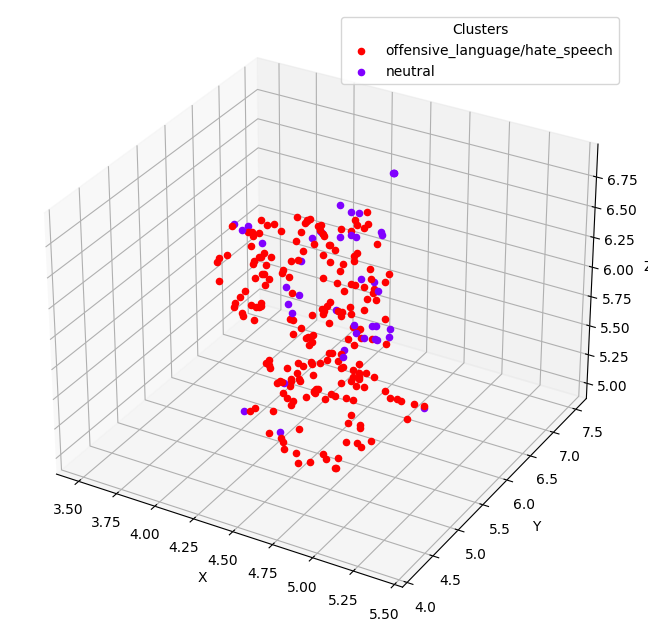

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
import matplotlib.cm as cm

# Setting x, y and z values for the plot
x, y, z = reduced_embeddings[:,0], reduced_embeddings[:,1], reduced_embeddings[:,2]
unique_labels = np.unique(sample_labels)

# Map each unique label to a color
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
label_color_dict = dict(zip(unique_labels, colors))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each point, coloring by label
for i, label in enumerate(sample_labels):
    ax.scatter(x[i], y[i], z[i], color=label_color_dict[label], label=label)

# Create custom legend
handles, labels = ax.get_legend_handles_labels()
new_legends = dict(zip(labels, handles))
ax.legend(new_legends.values(), new_legends.keys(), title="Clusters")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [16]:
# Initialize and fit UMAP. Reduce the dimensionality to 2 dimensions
reducer_2d = UMAP(n_neighbors=3, n_components=2, metric='cosine', min_dist=0.05, spread=0.5)
reduced_embeddings_2d = reducer_2d.fit_transform(embeddings_array)

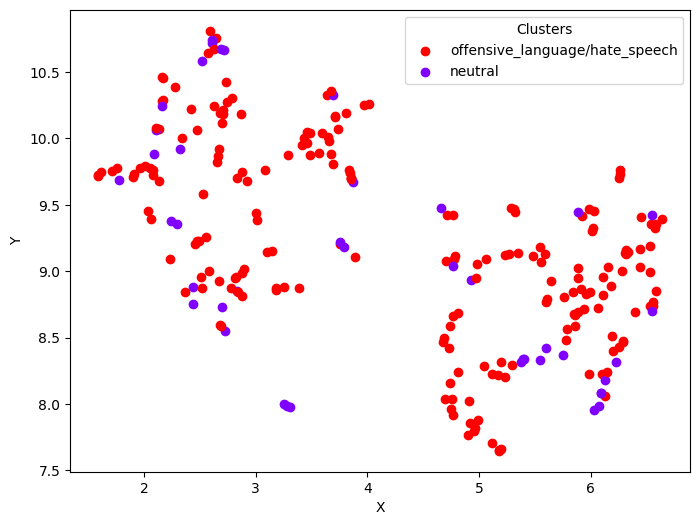

In [17]:
# Setting the x and y values for the plot
x, y = reduced_embeddings_2d[:,0], reduced_embeddings_2d[:,1]
unique_labels = np.unique(sample_labels)

# Mapping labels to colors
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
label_color_dict = dict(zip(unique_labels, colors))

fig, ax = plt.subplots(figsize=(8, 6))

# Plotting and creating a legend
for i, label in enumerate(sample_labels):
    ax.scatter(x[i], y[i], color=label_color_dict[label], label=label)

handles, labels = ax.get_legend_handles_labels()
new_legends = dict(zip(labels, handles))
ax.legend(new_legends.values(), new_legends.keys(), title="Clusters")

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

In [18]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != "class"], df["class"],
                                                    test_size=0.3,
                                                    stratify=df["class"])

In [19]:
for dataset in [X_train, X_test]:
    dataset["tweet_cleaned"] = dataset["tweet"].apply(lambda x: clean_sentence(x))
    print(f'Cleaned {len(dataset["tweet_cleaned"])} records in dataset')

Cleaned 17348 records in dataset
Cleaned 7435 records in dataset


In [21]:
# Get embeddings for the training and test set
train_embeddings = text_embeddings.get_embeddings(texts=X_train["tweet_cleaned"].tolist(), batch_size=256)
train_embeddings_df = pd.DataFrame(train_embeddings)

Total number of records: 17348
Num batches: 68


100%|████████████████████████████████████████████████████████████████████████████████████████████| 68/68 [00:06<00:00, 10.53it/s]


In [22]:
test_embeddings = text_embeddings.get_embeddings(texts=X_test["tweet_cleaned"].tolist(), batch_size=256)
test_embeddings_df = pd.DataFrame(test_embeddings)

Total number of records: 7435
Num batches: 30


100%|████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.64it/s]


In [23]:
from collections import Counter

# Get class counts
print(Counter(y_train))

Counter({1: 14434, 0: 2914})
